<a href="https://colab.research.google.com/github/17aabbas/World-Happiness/blob/main/World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

filepath_report = '/content/sample_data/World_Happiness_2019.csv'
happiness_data = pd.read_csv(filepath_report)

# Standard function to import CSV file into Pandas for data reading and manipulation. pd.read_csv() can also be pd.read_excel() for excel files.
# Import Pandas as pd to use pandas function as pd is a short form and easier to access.
# filepath_report is storing the location of the CSV file into that variable which can be called upon as needed (demonstrated in happiness_data)

In [ ]:
happiness_data.head()
# Shows the first 5 rows (by default), can specify how many values to show: ex. happiness_data.head(3)
happiness_data.tail()
# Shows the last 5 rows (by default), can specify how many values to show: ex. happiness_data.tail(3)
happiness_data.describe()
# Shows a statistical summary of the data
happiness_data.info()
# Shows the data type of each column
happiness_data.shape
# Shows the number of rows and columns in the data
happiness_data.columns
# Shows the column names of the data
happiness_data.index
# Shows the index of the data

# All of these functions will not run at the same time, it will run the last one, so for now I will show the head

happiness_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happiness_data.duplicated().sum()
# We can see if there are any duplicates in the dataset, which there is not.

0

In [ ]:
happiness_data.isnull().sum()
# We can see if there are any missing values in the dataset, which there is not.

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [ ]:
# Due to having clean data, we will not need to change this further. We can create an individual correlation of all the features in accordance to the score.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Grouping all needed columns in one list so we can iterate on them specifically
columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# We can create a for loop to calculate the correlation of the indicated columns with the score, and visualize it at once, rather than repeating the steps

for column in columns:
    # Calculates the score vs the columns in the list indicated above
    # We use a f string here because we are embedding multiple variables inside columns
    print(f"Score VS {column}")
    # Creates the correlation
    correlation = happiness_data['Score'].corr(happiness_data[column])
    print("Correlation: ", correlation)
    # Visualize it using px
    fig = px.scatter(happiness_data, x = column, y = 'Score', title = f"Score VS {column}")
    fig.show()


Score VS GDP per capita
Correlation:  0.7938828678781275


Score VS Social support
Correlation:  0.7770577880638644


Score VS Healthy life expectancy
Correlation:  0.7798831492425828


Score VS Freedom to make life choices
Correlation:  0.5667418257199898


Score VS Generosity
Correlation:  0.07582369490389652


Score VS Perceptions of corruption
Correlation:  0.38561307086647856


### According to our visuals:


1.   Strong correlation between score and GDP per capita
2.   Strong correlation between score and Health life expectancy
3.   Strong correlation between score and social support




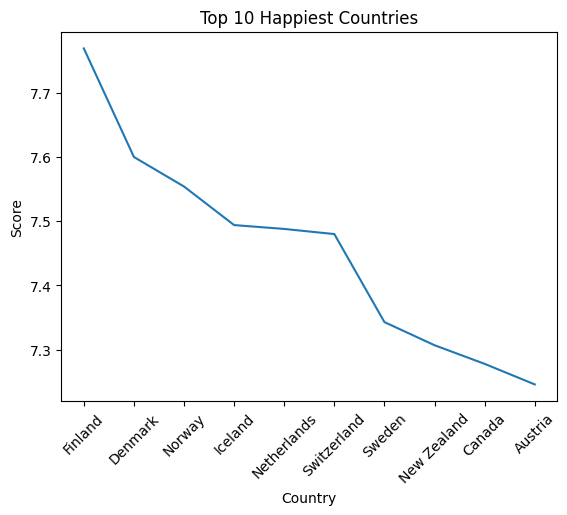

In [ ]:
# Lets visualize the countries by score. We want to view only the top 10 countries with the highest score

top_10_countries = happiness_data.nlargest(10, 'Score') # Creating a new table and storing it in a new variable that contains the 10 largest values by score.

plt.plot(top_10_countries['Country or region'], top_10_countries['Score']) # Using the new table and selecting the columns
plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Happiest Countries')
plt.show()

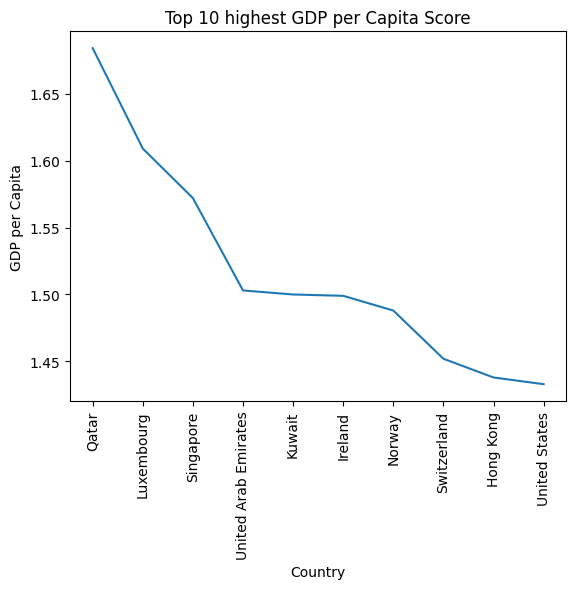

In [ ]:
# We can repeat the above for different values, such as GDP per capita
top_10_countries_gdp = happiness_data.nlargest(10, 'GDP per capita')

plt.plot(top_10_countries_gdp['Country or region'], top_10_countries_gdp['GDP per capita'])
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('Top 10 highest GDP per Capita Score')
plt.show()

In [ ]:
# Creating a linear regression model for this dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = happiness_data.drop(['Overall rank', 'Country or region', 'Score'], axis = 1) # Select the features OR drop unnecessary features for our model
y = happiness_data['Score'] # Target variable

scaler = StandardScaler() # Standardize the features
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Split the data into training and testing sets

model = LinearRegression()  # Create a linear regression model
model.fit(X_train, y_train) # Fit the model to the training data

y_pred = model.predict(X_test) # Predict the target variable for the test set

mse = mean_squared_error(y_test, y_pred) # Calculate the mean squared error
r2 = r2_score(y_test, y_pred) # Calculate the R-squared score

print("Mean Squared Error: ", mse) # Print the mean squared error
print("R2 Score: ", r2)  # Print the R-squared score

Mean Squared Error:  0.4144641383528349
R2 Score:  0.6017537913445685


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Random Forest Model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Mean Squared Error:  0.3872079025406254
R2 Score:  0.627943494071491


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # GBR model
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting - Mean Squared Error: ", mse)
print("Gradient Boosting - R² Score: ", r2)

Gradient Boosting - Mean Squared Error:  0.41172979078120997
Gradient Boosting - R² Score:  0.6043811442390157


### To conclude, we visualized different features of the dataset, and created 3 different ML models that did not yield fantastic results. Possibly could drastically improve with hypertuning on all three parameters.